# Kunskapskontroll 1
## Databastyper

**OBS!** Alla uppgifter som inte står under rubriken **Väl godkänt** krävs för **Godkänt** på kunskapskontrollen.


1. Förklara övergripande vad NoSQL är.


Svar:

In [ ]:
Svar: 
NoSQL är en typ av databashanteringssystem som skiljer sig från traditionella relationsdatabaser (SQL) 
genom att inte använda sig av tabeller och SQL för att lagra och hämta data. 
NoSQL-databaser är designade för att hantera stora mängder ostrukturerad eller semi-strukturerad data och är ofta mer flexibla och skalbara än relationsdatabaser. 
De kan hantera olika datatyper som dokument, nyckel-värde-par, grafstrukturer och breda kolumner. 
NoSQL-databaser används ofta i applikationer som kräver snabb åtkomst till stora datamängder, som sociala nätverk, realtidsanalys och IoT.

2. Vilken typ av data kan en NoSQL-databas hantera som inte en
relationell databas kan?


Svar: 

In [ ]:
Svar: 
En NoSQL-databas kan hantera ostrukturerad och semi-strukturerad data som inte passar väl in i tabellformatet som används av relationella databaser. Exempel på sådan data inkluderar:

- Dokument (t.ex. JSON, BSON)
- Nyckel-värde-par
- Grafstrukturer
- Bredkolumner

Dessa datatyper tillåter mer flexibilitet och skalbarhet, vilket gör NoSQL-databaser lämpliga för applikationer som kräver snabb åtkomst till stora mängder varierande data, 
som sociala nätverk, realtidsanalys och IoT.

3. Beskriv kortfattat vad en nyckel/värde-databas är.


Svar:

In [ ]:
Svar: 
En nyckel/värde-databas är en typ av NoSQL-databas som lagrar data som nyckel-värde-par. 
Varje nyckel är unik och används för att identifiera det tillhörande värdet, 
vilket kan vara en enkel datatyp eller en mer komplex datastruktur. 
Denna typ av databas är mycket snabb och skalbar, 
vilket gör den lämplig för applikationer som kräver snabb åtkomst till stora mängder data, som caching och sessionhantering.

4. Beskriv kortfattat vad en dokumentdatabas är.


Svar:

In [ ]:
En dokumentdatabas är en typ av NoSQL-databas som lagrar data i form av dokument, vanligtvis i format som JSON, BSON eller XML. 
Varje dokument innehåller data i ett strukturerat format och kan ha olika fält och datatyper. 
Dokumentdatabaser är flexibla och kan hantera komplexa och varierande datastrukturer, 
vilket gör dem lämpliga för applikationer som kräver snabb åtkomst till stora mängder ostrukturerad eller semi-strukturerad data, 
som innehållshanteringssystem och e-handelsplattformar.

5. Beskriv kortfattat vad en bredkolumndatabas är.


Svar:

In [ ]:
En bredkolumndatabas är en typ av NoSQL-databas som lagrar data i tabellformat, 
men till skillnad från traditionella relationsdatabaser kan varje rad ha ett varierande antal kolumner. 
Data organiseras i kolumnfamiljer, vilket gör det möjligt att lagra stora mängder data effektivt och snabbt hämta specifika kolumner. 
Bredkolumndatabaser är särskilt användbara för applikationer som kräver hög skalbarhet och prestanda, som realtidsanalys och stora datalager. 
Exempel på bredkolumndatabaser inkluderar Apache Cassandra och HBase.


6. Beskriv kortfattat vad en grafdatabas är.

Svar:

In [ ]:
En grafdatabas är en typ av NoSQL-databas som använder grafteori för att lagra, hämta och hantera data. 
Den representerar data som noder (entiteter) och kanter (relationer) mellan noderna. 
Grafdatabaser är särskilt användbara för att modellera och analysera komplexa relationer och nätverk, 
som sociala nätverk, rekommendationssystem och bedrägeridetektion. Exempel på grafdatabaser inkluderar Neo4j och Amazon Neptune.

### Nyckel/värdedatabas

Lägg till datan i filen `kunskapskontroll_1/data/northwind/orders.csv` i en Redis-databas.

In [ ]:
import redis
import pandas as pd

# Anslut till Redis
redis_client = redis.StrictRedis(host='localhost', port=6379, db=0, decode_responses=True)

# Ladda in CSV-filen
file_path = "C:/Users/stewe/source/repos/DATA24HEL_DBT25/kunskapskontroll_1/data/northwind/orders.csv"
df = pd.read_csv(file_path)

# Ersätt NaN-värden med tomma strängar
df = df.fillna("")

# Iterera över varje rad och lägg in datan i Redis
for _, row in df.iterrows():
    order_id = row['OrderID']
    order_key = f"order:{order_id}"
    
    redis_client.hmset(order_key, {
        "OrderDate": str(row["OrderDate"]),
        "RequiredDate": str(row["RequiredDate"]),
        "ShippedDate": str(row["ShippedDate"]),
        "ShipName": str(row["ShipName"]),
        "ShipCountry": str(row["ShipCountry"]),
        "ShipRegion": str(row["ShipRegion"]),
        "ShipCity": str(row["ShipCity"]),
        "ShipPostalCode": str(row["ShipPostalCode"]),
        "ShipAddress": str(row["ShipAddress"])
    })

print("Orderdata har lagts till i Redis!")


Ge ett exempel på hur vad man kan använda Redis-databasen du skapat till:

Svar: 

In [ ]:
def get_order_details(order_id):
    order_key = f"order:{order_id}"
    order_details = redis_client.hgetall(order_key)
    return order_details

# Example usage
order_id = 10248
order_details = get_order_details(order_id)
print(order_details)

### Dokumentdatabas

I mappen `kunskapskontroll_1/data/northwind/` finns filerna `products.csv` och `suppliers.json`.

Slå ihop `products.csv` och `suppliers.json` på ett passande sätt och spara dem som en dokumentdatabas i MongoDB.

#### Godkänt
Ta reda på:
* vilka produkter som behöver beställas (`ReorderLevel` $\gt$ `UnitsInStock` $ + $ `UnitsOnOrder`)
* vem man ska kontakta för att beställa fler, och
* hur man kontaktar personen


In [4]:
from pymongo import MongoClient
import pandas as pd

# Anslut till MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["northwind"]  # Skapa eller anslut till databasen "northwind"
collection = db["products"]  # Skapa eller anslut till collection "products"

# Ladda in data
products_df = pd.read_csv(r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\northwind\products.csv")
suppliers_df = pd.read_json(r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\northwind\suppliers.json")

# Slå ihop data
merged_df = products_df.merge(suppliers_df, on="SupplierID", how="left")

# Konvertera till JSON och lagra i MongoDB
records = merged_df.to_dict(orient="records")
collection.insert_many(records)

print("Data har lagrats i MongoDB!")

# Funktion för att hitta produkter som behöver beställas
def find_products_to_reorder():
    query = {"ReorderLevel": {"$gt": {"$add": ["$UnitsInStock", "$UnitsOnOrder"]}}}
    products = list(collection.find(query, {"ProductName": 1, "CompanyName": 1, "ContactName": 1, "Phone": 1}))
    
    if products:
        print("Produkter som behöver beställas:")
        for product in products:
            print(f"- {product['ProductName']} (Leverantör: {product['CompanyName']}, Kontakt: {product['ContactName']}, Tel: {product['Phone']})")
    else:
        print("Inga produkter behöver beställas just nu.")

# Kör frågan
find_products_to_reorder()

# Stäng anslutningen
client.close()


Data har lagrats i MongoDB!
Inga produkter behöver beställas just nu.



#### Väl godkänt
Skapa en Streamlit-app som visar produkter som behöver beställas och talar om vem man ska ringa för att beställa fler. Appen kan vara en enkel lista över produkter, eller innehålla fler funktioner (QR-kod-scanner?).

### Grafdatabas
**OBS** Fråga 1-3 nedan är desamma för både Godkänt och Väl godkänt. Det som skiljer sig är hur du väljer att skapa databasen samt fråga 4.

#### Godkänt
* Läs in `csv`-filerna i `kunskapskontroll_1/data/movies/prepared/` i Neo4j och skapa en datamodell.
* Svara på frågorna och utför instruktionerna nedan. Klistra in dina svar som JSON eller bilder, beroende på om svaret är i data- eller graf-form.
    1. Vilka är de 10 vanligaste kombinationerna av genrer?
    2. Vilka är de fem vanligaste genrerna på filmer regisserade av Steven Spielberg, och hur många filmer är i de genrerna?
    3. Det verkar som om de har missat att Viggo Mortensen är med i Sagan om Ringen-filmerna. Skapa `[:ACTED_IN]`-relationer mellan Viggo och alla tre *The Lord of the Rings*-filmerna. Visa en graf med Viggo i mitten och relationer till de tre filmerna.

#### Väl godkänt
* Bearbeta datan i `kunskapskontroll_1/data/movies/movies.json` så att den passar till att läsas in i Neo4j. Processen ska gå att följa i kodceller i notebooken. Du får gärna titta på filerna i `kunskapskontroll_1/data/movies/prepared/` för att få en idé om hur resultatet ska se ut.
* Läs in data in Neo4j.
* Svara på frågorna och utför instruktionerna nedan. Klistra in dina svar som JSON eller bilder, beroende på om svaret är i data- eller graf-form.
    1. Vilka är de 10 vanligaste kombinationerna av genrer?
    2. Vilka är de fem vanligaste genrerna på filmer regisserade av Steven Spielberg, och hur många filmer är i de genrerna?
    3. Det verkar som om de har missat att Viggo Mortensen är med i Sagan om Ringen-filmerna. Skapa `[:ACTED_IN]`-relationer mellan Viggo och alla tre *The Lord of the Rings*-filmerna. Visa en graf med Viggo i mitten och relationer till de tre filmerna.
    4. Hitta på minst en egen fråga och svara på den.



In [ ]:
%pip install neo4j

import pandas as pd
from neo4j import GraphDatabase

# === 1. Konfiguration ===
NEO4J_URI = "bolt://localhost:7687"  # Ändra om du använder en annan server
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "password"  # Byt ut till ditt faktiska lösenord

def execute_query(driver, query, parameters=None):
    with driver.session() as session:
        session.run(query, parameters or {})

# === 2. Anslut till Neo4j ===
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

# === 3. Ladda in CSV-filer ===
file_paths = {
    "directors": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\directors.csv",
    "genres": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\genres.csv",
    "genres_movies": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\genres_movies.csv",
    "movies": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\movies.csv",
    "actors": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\actors.csv",
    "actors_movies": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\actors_movies.csv",
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# === 4. Importera data till Neo4j ===
## 4.1 Importera filmer
query = """
LOAD CSV WITH HEADERS FROM 'file:///movies.csv' AS row
MERGE (m:Movie {id: row.movie_id})
SET m.title = row.movie_title,
    m.year = toInteger(row.title_year),
    m.imdb_score = toFloat(row.imdb_score),
    m.budget = toFloat(row.budget),
    m.gross = toFloat(row.gross),
    m.language = row.language;
"""
execute_query(driver, query)

## 4.2 Importera regissörer
query = """
LOAD CSV WITH HEADERS FROM 'file:///directors.csv' AS row
MERGE (d:Director {id: row.director_id, name: row.director_name});
"""
execute_query(driver, query)

## 4.3 Koppla regissörer till filmer
query = """
LOAD CSV WITH HEADERS FROM 'file:///movies.csv' AS row
MATCH (d:Director {id: row.director_id})
MATCH (m:Movie {id: row.movie_id})
MERGE (d)-[:DIRECTED]->(m);
"""
execute_query(driver, query)

## 4.4 Importera skådespelare
query = """
LOAD CSV WITH HEADERS FROM 'file:///actors.csv' AS row
MERGE (a:Actor {id: row.actor_id, name: row.actor_name});
"""
execute_query(driver, query)

## 4.5 Koppla skådespelare till filmer
query = """
LOAD CSV WITH HEADERS FROM 'file:///actors_movies.csv' AS row
MATCH (a:Actor {id: row.actor_id})
MATCH (m:Movie {id: row.movie_id})
MERGE (a)-[:ACTED_IN]->(m);
"""
execute_query(driver, query)

## 4.6 Importera genrer
query = """
LOAD CSV WITH HEADERS FROM 'file:///genres.csv' AS row
MERGE (g:Genre {id: row.genre_id, name: row.genre});
"""
execute_query(driver, query)

## 4.7 Koppla genrer till filmer
query = """
LOAD CSV WITH HEADERS FROM 'file:///genres_movies.csv' AS row
MATCH (g:Genre {id: row.genre_id})
MATCH (m:Movie {id: row.movie_id})
MERGE (m)-[:BELONGS_TO]->(g);
"""
execute_query(driver, query)

# === 5. Uppdatera relationen för Viggo Mortensen ===
query = """
MATCH (a:Actor {name: 'Viggo Mortensen'})
MATCH (m:Movie)
WHERE m.title CONTAINS 'Lord of the Rings'
MERGE (a)-[:ACTED_IN]->(m);
"""
execute_query(driver, query)

# === 6. Stäng anslutningen ===
driver.close()

print("Import och uppdatering i Neo4j slutförd!")


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


FileNotFoundError: [Errno 2] No such file or directory: 'directors.csv'

In [ ]:
import os
print(os.listdir())

%pip install networkx matplotlib


Topp 10 genre-kombinationer:
genre
(Drama,)                            233
(Comedy,)                           205
(Comedy, Drama)                     189
(Comedy, Drama, Romance)            185
(Comedy, Romance)                   157
(Drama, Romance)                    150
(Crime, Drama, Thriller)             98
(Horror,)                            67
(Action, Crime, Drama, Thriller)     65
(Crime, Drama)                       63
Name: count, dtype: int64

Topp 5 genrer i Spielberg-filmer:
genre
Drama        13
Adventure    12
Action        9
Sci-Fi        7
Thriller      6
Name: count, dtype: int64

Viggo Mortensen och Sagan om Ringen-filmer:
   actor_id  movie_id
0       794       248
1       794       307
2       794       308

Skådespelaren med flest filmer: Robert De Niro ( 53 filmer )

Regissören med högst IMDb-score: Sadyk Sher-Niyaz ( 8.7 )

Mest filmrika årtiondet: 2000 ( 2039 filmer )

Genren med högst IMDb-score: Film-Noir ( 7.63 )


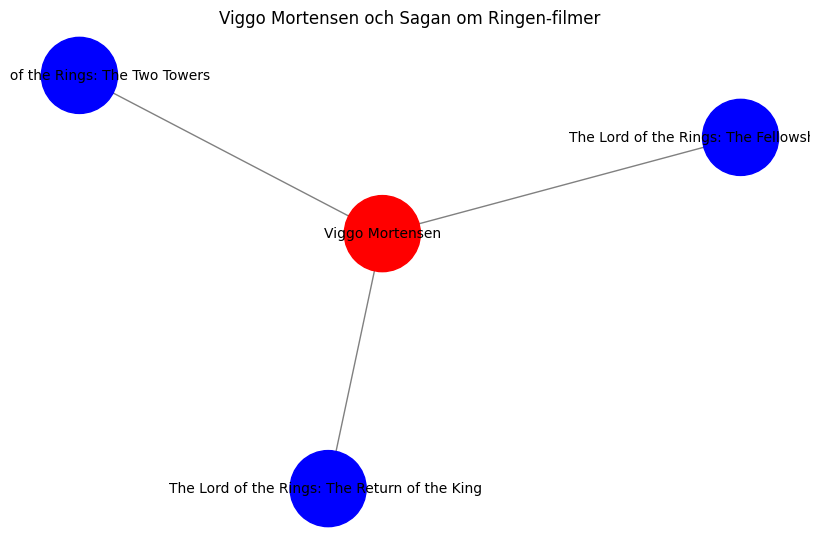

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# === 1. Ladda in CSV-filer ===
file_paths = {
    "directors": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\directors.csv",
    "genres": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\genres.csv",
    "genres_movies": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\genres_movies.csv",
    "movies": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\movies.csv",
    "actors": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\actors.csv",
    "actors_movies": r"C:\Users\stewe\source\repos\DATA24HEL_DBT25\kunskapskontroll_1\data\movies\prepared\actors_movies.csv",
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# === 2. Identifiera de 10 vanligaste genre-kombinationerna ===
genres_movies = dataframes["genres_movies"].merge(dataframes["genres"], on="genre_id", how="left")
movie_genres = genres_movies.groupby("movie_id")["genre"].apply(lambda x: tuple(sorted(x))).reset_index()
genre_combinations = movie_genres["genre"].value_counts().head(10)
print("\nTopp 10 genre-kombinationer:")
print(genre_combinations)

# === 3. Fem vanligaste genrerna i Steven Spielbergs filmer ===
spielberg_id = dataframes["directors"].loc[dataframes["directors"]["director_name"] == "Steven Spielberg", "director_id"]
if not spielberg_id.empty:
    spielberg_id = spielberg_id.values[0]
    spielberg_movies = dataframes["movies"].loc[dataframes["movies"]["director_id"] == spielberg_id, "movie_id"]
    spielberg_genres = genres_movies.loc[genres_movies["movie_id"].isin(spielberg_movies), "genre"]
    top_spielberg_genres = spielberg_genres.value_counts().head(5)
    print("\nTopp 5 genrer i Spielberg-filmer:")
    print(top_spielberg_genres)

# === 4. Koppling mellan Viggo Mortensen och Sagan om Ringen-filmer ===
viggo_id = dataframes["actors"].loc[dataframes["actors"]["actor_name"] == "Viggo Mortensen", "actor_id"]
if not viggo_id.empty:
    viggo_id = viggo_id.values[0]
    lotr_movies = dataframes["movies"].loc[dataframes["movies"]["movie_title"].str.contains("Lord of the Rings", case=False, na=False)]
    lotr_movie_ids = lotr_movies["movie_id"].tolist()
    viggo_lotr_connections = pd.DataFrame({"actor_id": [viggo_id] * len(lotr_movie_ids), "movie_id": lotr_movie_ids})
    print("\nViggo Mortensen och Sagan om Ringen-filmer:")
    print(viggo_lotr_connections)

# === 5. Extra analyser ===
## 5.1. Skådespelaren med flest filmer
top_actor_movies = dataframes["actors_movies"]["actor_id"].value_counts().head(1)
top_actor = dataframes["actors"].loc[dataframes["actors"]["actor_id"] == top_actor_movies.index[0], "actor_name"].values[0]
print("\nSkådespelaren med flest filmer:", top_actor, "(", int(top_actor_movies.values[0]), "filmer )")

## 5.2. Regissören med högst genomsnittlig IMDb-score
director_movies = dataframes["movies"].groupby("director_id")["imdb_score"].mean()
top_director_id = director_movies.idxmax()
top_director = dataframes["directors"].loc[dataframes["directors"]["director_id"] == top_director_id, "director_name"].values[0]
print("\nRegissören med högst IMDb-score:", top_director, "(", round(director_movies.max(), 2), ")")

## 5.3. Årtiondet med flest filmer
dataframes["movies"]["decade"] = (dataframes["movies"]["title_year"] // 10) * 10
decade_counts = dataframes["movies"]["decade"].value_counts().head(1)
print("\nMest filmrika årtiondet:", int(decade_counts.index[0]), "(", int(decade_counts.values[0]), "filmer )")

## 5.4. Genren med högst genomsnittlig IMDb-score
genre_scores = genres_movies.merge(dataframes["movies"], on="movie_id", how="left")
top_genre_avg_score = genre_scores.groupby("genre")["imdb_score"].mean().idxmax()
print("\nGenren med högst IMDb-score:", top_genre_avg_score, "(", round(genre_scores.groupby("genre")["imdb_score"].mean().max(), 2), ")")

# === 6. Grafvisualisering av Viggo Mortensen och Sagan om Ringen-filmer ===
G = nx.Graph()
G.add_node("Viggo Mortensen", color="red")
for movie in lotr_movies["movie_title"]:
    G.add_node(movie, color="blue")
    G.add_edge("Viggo Mortensen", movie)

colors = [G.nodes[n]["color"] for n in G.nodes]
plt.figure(figsize=(8, 5))
nx.draw(G, with_labels=True, node_color=colors, edge_color="gray", node_size=3000, font_size=10)
plt.title("Viggo Mortensen och Sagan om Ringen-filmer")
plt.show()


## Vad ska lämnas in på Learnpoint?

Deadline: 14/2 kl. 17.00

En länk till ett Github-repository som innehåller:
* en kopia av den här notebooken med dina svar på uppgifterna. **Använd kod-celler för kod och markdown-celler för text!**
* bilder på grafer så att de kan visas i notebooken
* VG: om du gjort en Streamlit-app i dokumentdatabas-delen ska där också finnas en `app.py` eller motsvarande med koden för appen.

That's it!